In [1]:
import pandas as pd
import numpy as np
import datetime
from pandas import read_html
import html5lib

# Plotly Method Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

/home/rafal/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/home/rafal/anaconda3/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




# 1. Otwarcie notowań z pliku tekstowego i jego przygotowanie

In [2]:
# otwarcie plików tekstowych ze strony http://bossa.pl/notowania/metastock/
Bit = pd.read_csv('./DANE/11BIT.mst')
ART = pd.read_csv('./DANE/ARTIFEX.mst')
CDR = pd.read_csv('./DANE/CDPROJEKT.mst')
CIG = pd.read_csv('./DANE/CIGAMES.mst')
PLW = pd.read_csv('./DANE/PLAYWAY.mst')
TBL = pd.read_csv('./DANE/TBULL.mst')
TEN = pd.read_csv('./DANE/TSGAMES.mst')
VVD = pd.read_csv('./DANE/VIVID.mst')

In [4]:
# wyswietlenia nazw kolumn, w celu ich pozniejszej zmiany na Date,Open,High,Low,Close
TEN.columns

Index(['<TICKER>', '<DTYYYYMMDD>', '<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>',
       '<VOL>'],
      dtype='object')

In [3]:
#słownik zawierajacy nowe nazwy dla kolumn
dict_Ticker={'<TICKER>':'Ticker', '<DTYYYYMMDD>':'Date', '<OPEN>':'Open', '<HIGH>':'High', '<LOW>':'Low', '<CLOSE>':'Close',
       '<VOL>':'Volume'}

In [4]:
#metoda .rename zamienia nazwy kolumn wg słownika
Bit.rename(columns=dict_Ticker, inplace=True)
ART.rename(columns=dict_Ticker, inplace=True)
CDR.rename(columns=dict_Ticker, inplace=True)
CIG.rename(columns=dict_Ticker, inplace=True)
PLW.rename(columns=dict_Ticker, inplace=True)
TBL.rename(columns=dict_Ticker, inplace=True)
TEN.rename(columns=dict_Ticker, inplace=True)
VVD.rename(columns=dict_Ticker, inplace=True)

In [5]:
TEN.head()

Ticker      Date   Open  High    Low  Close  Volume
0  TSGAMES  20180511  52.20  63.0  51.11  62.00  200776
1  TSGAMES  20180514  68.00  74.8  65.30  66.70  240228
2  TSGAMES  20180515  66.60  66.6  58.28  62.00   93961
3  TSGAMES  20180516  63.50  63.9  60.01  63.67   34008
4  TSGAMES  20180517  63.87  63.9  59.00  59.00   24068

In [8]:
#Zmiana typu kolumny date na typ znacznika czasowego
Bit['Date']=pd.to_datetime(Bit['Date'],format="%Y%m%d")
ART['Date']=pd.to_datetime(ART['Date'],format="%Y%m%d")
CDR['Date']=pd.to_datetime(CDR['Date'],format="%Y%m%d")
CIG['Date']=pd.to_datetime(CIG['Date'],format="%Y%m%d")
PLW['Date']=pd.to_datetime(PLW['Date'],format="%Y%m%d")
TBL['Date']=pd.to_datetime(TBL['Date'],format="%Y%m%d")
TEN['Date']=pd.to_datetime(TEN['Date'],format="%Y%m%d")
VVD['Date']=pd.to_datetime(VVD['Date'],format="%Y%m%d")

In [9]:
# zmiana typu kolumn z obiect na float
Bit[['Open','High','Low','Close']] = Bit[['Open','High','Low','Close']].astype('float')
ART[['Open','High','Low','Close']] = ART[['Open','High','Low','Close']].astype('float')
CDR[['Open','High','Low','Close']] = CDR[['Open','High','Low','Close']].astype('float')
CIG[['Open','High','Low','Close']] = CIG[['Open','High','Low','Close']].astype('float')
PLW[['Open','High','Low','Close']] = PLW[['Open','High','Low','Close']].astype('float')
TBL[['Open','High','Low','Close']] = TBL[['Open','High','Low','Close']].astype('float')
TEN[['Open','High','Low','Close']] = TEN[['Open','High','Low','Close']].astype('float')
VVD[['Open','High','Low','Close']] = VVD[['Open','High','Low','Close']].astype('float')

In [10]:
# usuniecie kolumnu o nazwie Ticker
Bit.drop(axis=1,columns=['Ticker'], inplace=True)
ART.drop(axis=1,columns=['Ticker'], inplace=True)
CDR.drop(axis=1,columns=['Ticker'], inplace=True)
CIG.drop(axis=1,columns=['Ticker'], inplace=True)
PLW.drop(axis=1,columns=['Ticker'], inplace=True)
TBL.drop(axis=1,columns=['Ticker'], inplace=True)
TEN.drop(axis=1,columns=['Ticker'], inplace=True)
VVD.drop(axis=1,columns=['Ticker'], inplace=True)

In [11]:
VVD.head()

Date  Open  High   Low  Close  Volume
0 2012-06-11  0.39  0.39  0.29   0.30  304634
1 2012-06-12  0.32  0.32  0.20   0.20  250051
2 2012-06-13  0.20  0.24  0.20   0.21   34678
3 2012-06-14  0.23  0.28  0.23   0.25   55620
4 2012-06-15  0.29  0.29  0.24   0.25   61202

In [12]:
# reset standardowego indexu, nie usuwa tej kolumny
Bit.reset_index()
ART.reset_index()
CDR.reset_index()
CIG.reset_index()
PLW.reset_index()
TBL.reset_index()
TEN.reset_index()
VVD.reset_index()

index       Date  Open   High   Low  Close   Volume
0         0 2012-06-11  0.39  0.390  0.29  0.300   304634
1         1 2012-06-12  0.32  0.320  0.20  0.200   250051
2         2 2012-06-13  0.20  0.240  0.20  0.210    34678
3         3 2012-06-14  0.23  0.280  0.23  0.250    55620
4         4 2012-06-15  0.29  0.290  0.24  0.250    61202
5         5 2012-06-18  0.24  0.260  0.23  0.230     7249
6         6 2012-06-19  0.25  0.250  0.24  0.250    16143
7         7 2012-06-20  0.25  0.260  0.25  0.250     2200
8         8 2012-06-21  0.25  0.260  0.25  0.260      491
9         9 2012-06-22  0.26  0.260  0.26  0.260      185
10       10 2012-06-25  0.26  0.260  0.26  0.260      161
11       11 2012-06-26  0.25  0.250  0.25  0.250     1000
12       12 2012-06-27  0.24  0.240  0.23  0.240    18110
13       13 2012-06-28  0.25  0.250  0.25  0.250   101176
14       14 2012-06-29  0.25  0.250  0.25  0.250      600
15       15 2012-07-02  0.25  0.260  0.24  0.240     5300
16       16 2012-07-03  0.24  0.240  0.24  0.240    12357
17       17 2012-07-04  0.24  0.240  0.24  0.240      800
18       18 2012-07-05  0.24  0.240  0.24  0.240     1000
19       19 2012-07-06  0.25  0.250  0.23  0.230     3550
20       20 2012-07-09  0.23  0.230  0.23  0.230    13688
21       21 2012-07-10  0.22  0.230  0.22  0.230     9305
22       22 2012-07-11  0.23  0.240  0.23  0.240      320
23       23 2012-07-12  0.24  0.240  0.24  0.240     3001
24       24 2012-07-17  0.23  0.230  0.23  0.230     4958
25       25 2012-07-18  0.23  0.230  0.21  0.230   161420
26       26 2012-07-25  0.23  0.240  0.23  0.240     2524
27       27 2012-07-26  0.23  0.230  0.23  0.230     5738
28       28 2012-07-31  0.23  0.230  0.23  0.230     6168
29       29 2012-08-03  0.23  0.230  0.22  0.230    10100
...     ...        ...   ...    ...   ...    ...      ...
1651   1651 2019-02-19  2.09  2.110  1.98  2.010   165202
1652   1652 2019-02-20  2.02  2.020  1.92  1.950   166710
1653   1653 2019-02-21  1.92  2.230  1.91  2.150   403633
1654   1654 2019-02-22  2.15  2.220  2.12  2.190    79774
1655   1655 2019-02-25  2.18  2.180  2.10  2.140   125134
1656   1656 2019-02-26  2.13  2.150  2.08  2.150   134030
1657   1657 2019-02-27  2.17  2.180  2.11  2.130    54586
1658   1658 2019-02-28  2.11  2.290  2.11  2.210   125782
1659   1659 2019-03-01  2.21  2.220  2.18  2.200    25366
1660   1660 2019-03-04  2.29  2.290  2.16  2.210    29746
1661   1661 2019-03-05  2.23  2.280  2.16  2.160    91441
1662   1662 2019-03-06  2.22  2.230  2.16  2.190    30571
1663   1663 2019-03-07  2.23  2.240  2.13  2.200    81479
1664   1664 2019-03-08  2.20  2.200  2.16  2.180    25177
1665   1665 2019-03-11  2.18  2.200  2.10  2.150    32924
1666   1666 2019-03-12  2.12  2.170  2.08  2.120   104973
1667   1667 2019-03-13  2.11  2.150  2.06  2.090    99099
1668   1668 2019-03-14  2.11  2.120  2.06  2.080    33468
1669   1669 2019-03-15  2.08  2.130  2.07  2.100    49155
1670   1670 2019-03-18  2.10  2.230  2.08  2.110   170423
1671   1671 2019-03-19  2.14  2.240  2.11  2.120   225471
1672   1672 2019-03-20  2.06  2.060  1.88  1.890  1030667
1673   1673 2019-03-21  1.93  1.930  1.67  1.710  1070827
1674   1674 2019-03-22  1.69  1.755  1.60  1.700   651575
1675   1675 2019-03-25  1.70  1.845  1.70  1.800   365633
1676   1676 2019-03-26  1.76  1.900  1.76  1.850   157159
1677   1677 2019-03-27  1.89  1.890  1.75  1.805   155363
1678   1678 2019-03-28  1.80  1.830  1.74  1.810   168898
1679   1679 2019-03-29  1.77  1.830  1.75  1.780   113517
1680   1680 2019-04-01  1.79  1.800  1.70  1.744   144748

[1681 rows x 7 columns]

In [13]:
#Ustawienia kolumny Date jako nowy index
Bit.set_index(keys='Date',inplace=True)
ART.set_index(keys='Date',inplace=True)
CDR.set_index(keys='Date',inplace=True)
CIG.set_index(keys='Date',inplace=True)
PLW.set_index(keys='Date',inplace=True)
TBL.set_index(keys='Date',inplace=True)
TEN.set_index(keys='Date',inplace=True)
VVD.set_index(keys='Date',inplace=True)

In [14]:
CDR.head()

Open  High   Low  Close  Volume
Date                                       
1994-08-02  40.0  40.0  40.0   40.0   71824
1994-08-03  44.0  44.0  44.0   44.0   67228
1994-08-04  48.4  48.4  48.4   48.4   73432
1994-08-08  44.0  44.0  44.0   44.0   54500
1994-08-09  52.0  52.0  52.0   52.0   27962

# 2. Przeglądanie danych

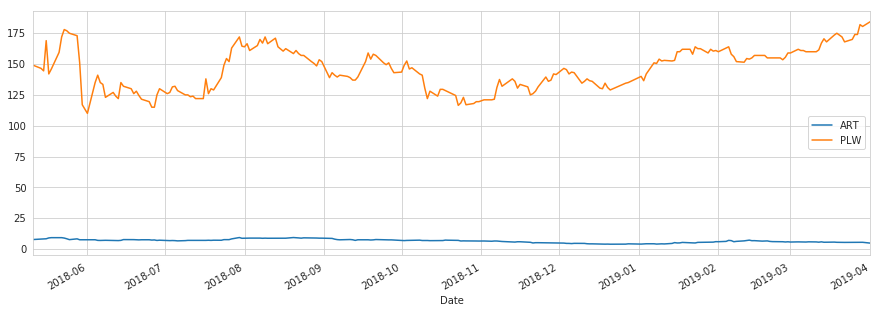

In [15]:
#Bit.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='11B')
ART.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='ART')
#CDR.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='CDR')
#CIG.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='CIG')
PLW.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='PLW')
#TBL.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='TBL')
#TEN.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='TEN')
#VVD.loc['2018-05-11':'2019-04-01']['Close'].plot(figsize=(15,5),label='VVD')
plt.legend()

In [16]:
spolki_gamingowe = ['11B','ART','CDR','CIG','PLW','TBL','TEN','VVD']

In [17]:
start_okres = '2018-05-11'

In [18]:
gaming_stock = pd.concat([Bit.loc[start_okres:],ART.loc[start_okres:],CDR.loc[start_okres:],CIG.loc[start_okres:],PLW.loc[start_okres:],TBL.loc[start_okres:],
TEN.loc[start_okres:],VVD.loc[start_okres:]],axis=1,keys=spolki_gamingowe)

In [19]:
gaming_stock.columns.names = ['Gaming Ticker','Stock Info']

In [20]:
gaming_stock.xs(key='Close',axis=1,level='Stock Info').max()

Gaming Ticker
11B    529.00
ART      9.30
CDR    219.80
CIG      1.54
PLW    184.40
TBL     85.00
TEN    125.50
VVD      6.12
dtype: float64

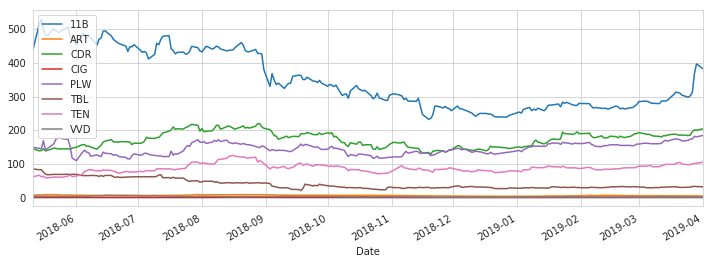

In [21]:
for tick in spolki_gamingowe:
    gaming_stock[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend(loc='upper left')

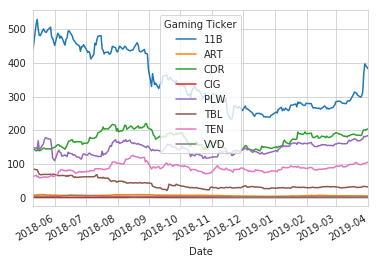

In [22]:
gaming_stock.xs(key='Close', axis=1,level='Stock Info').plot()

In [ ]:
gaming_stock.xs(key='Close', axis=1,level='Stock Info').iplot()

In [24]:
returns = pd.DataFrame()

In [25]:
for tick in spolki_gamingowe:
    returns[tick+' Return'] = gaming_stock[tick]['Close'].pct_change()
returns.head()

11B Return  ART Return  CDR Return  CIG Return  PLW Return  \
Date                                                                     
2018-05-11         NaN         NaN         NaN         NaN         NaN   
2018-05-14    0.167800    0.051948   -0.041379    0.052632   -0.016779   
2018-05-15    0.027184    0.009877    0.005755   -0.020000   -0.013652   
2018-05-16   -0.054820    0.014670    0.037196    0.000000    0.169550   
2018-05-17   -0.037000    0.081928   -0.041379   -0.010204   -0.159763   

            TBL Return  TEN Return  VVD Return  
Date                                            
2018-05-11         NaN         NaN         NaN  
2018-05-14   -0.023529    0.075806   -0.017621  
2018-05-15    0.000000   -0.070465    0.000000  
2018-05-16   -0.084337    0.026935   -0.002242  
2018-05-17   -0.078947   -0.073347   -0.015730

In [26]:
returns.min()

11B Return   -0.131579
ART Return   -0.129412
CDR Return   -0.105321
CIG Return   -0.205882
PLW Return   -0.225166
TBL Return   -0.185714
TEN Return   -0.160908
VVD Return   -0.345361
dtype: float64

In [27]:
returns.loc['2018-04-01':'2019-04-01'].std()

11B Return    0.035914
ART Return    0.039195
CDR Return    0.030908
CIG Return    0.048608
PLW Return    0.043070
TBL Return    0.058126
TEN Return    0.038545
VVD Return    0.061802
dtype: float64

In [28]:
Bit.loc['2018-05-11':].head(5)

Open   High    Low  Close  Volume
Date                                          
2018-05-11  393.0  441.0  387.5  441.0   64688
2018-05-14  459.5  518.0  458.5  515.0  118059
2018-05-15  505.0  548.0  484.0  529.0   61873
2018-05-16  530.0  540.0  495.0  500.0   44254
2018-05-17  498.0  499.0  461.5  481.5   53740

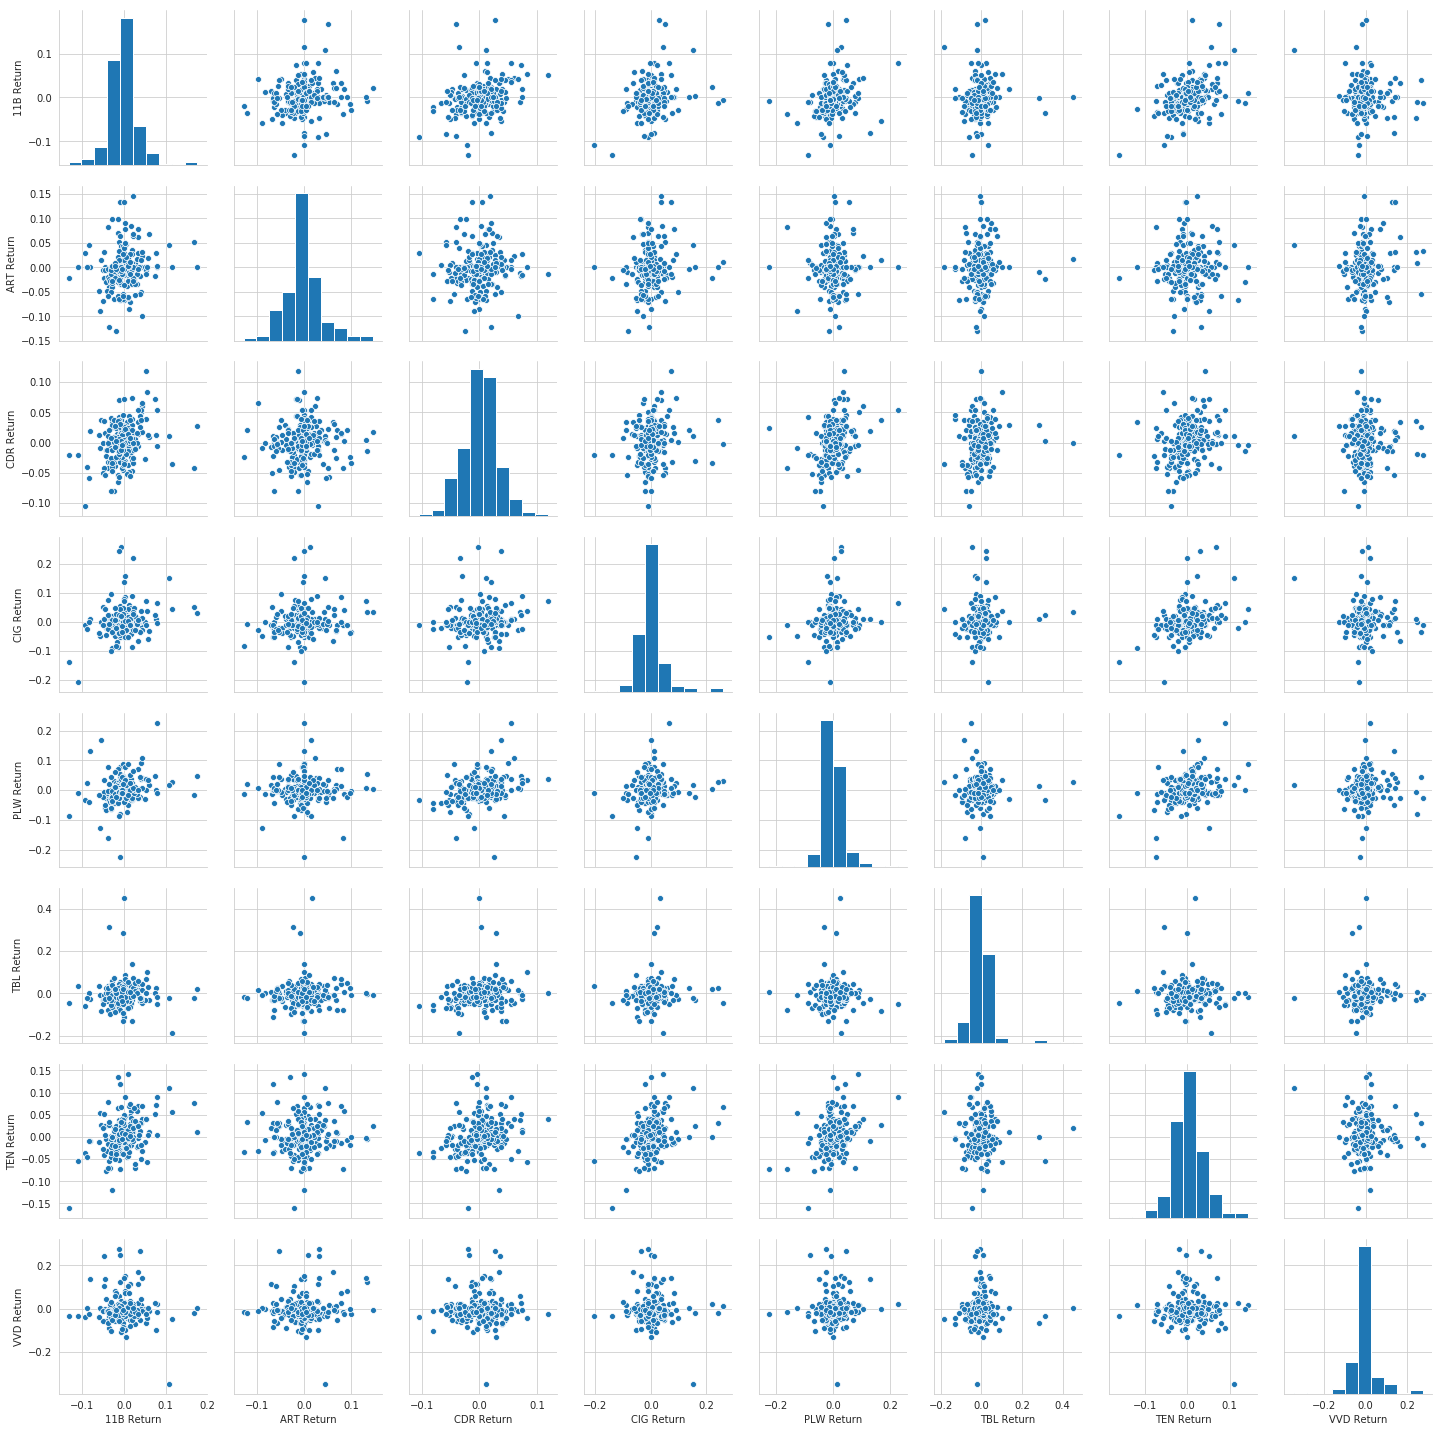

In [29]:
sns.pairplot(returns[1:])

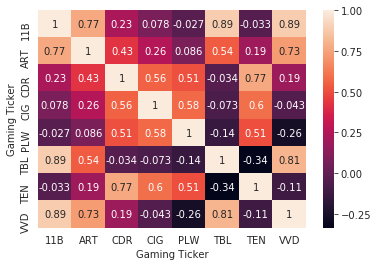

In [30]:
sns.heatmap(gaming_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [31]:
close_cor = gaming_stock.xs(key='Close',axis=1,level='Stock Info').corr()

In [ ]:
close_cor.iplot(kind='heatmap',colorscale='rdylbu')

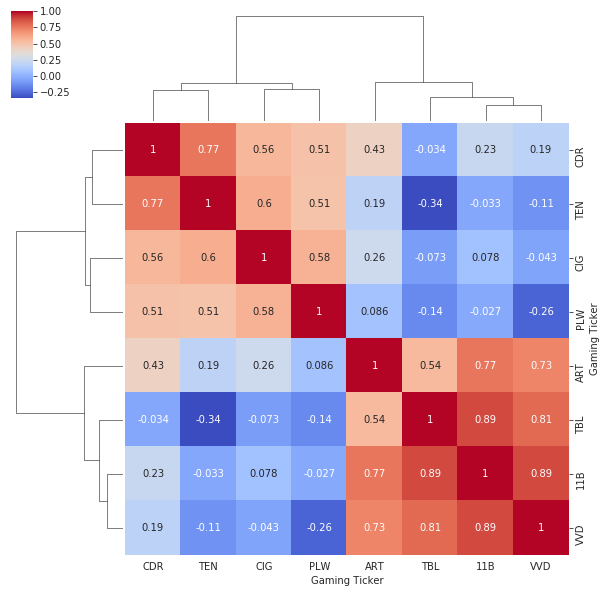

In [33]:
sns.clustermap(gaming_stock.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='coolwarm')

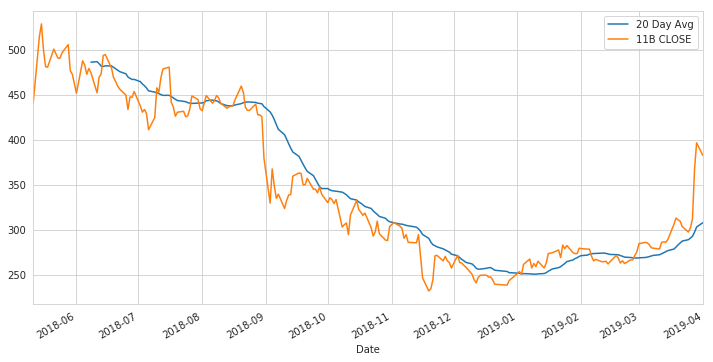

In [34]:
plt.figure(figsize=(12,6))
Bit['Close'].loc[start_okres:'2019-04-01'].rolling(window=20).mean().plot(label='20 Day Avg')
Bit['Close'].loc[start_okres:'2019-04-01'].plot(label='11B CLOSE')
plt.legend()

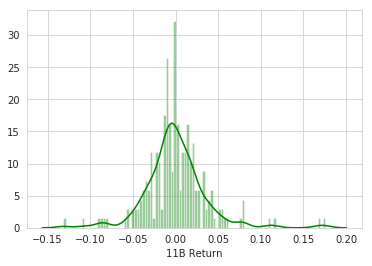

In [35]:
sns.distplot(returns.loc['2018-05-14':'2019-04-01']['11B Return'],color='green',bins=100)

In [ ]:
Bit[['Open', 'High', 'Low', 'Close']].loc['2018-05-11':'2019-04-01'].iplot(kind='candle')

In [ ]:
Bit['Close'].loc['2018-06-01':'2019-04-01'].ta_plot(study='sma',periods=[13,21,55])

# Bollinger Bands

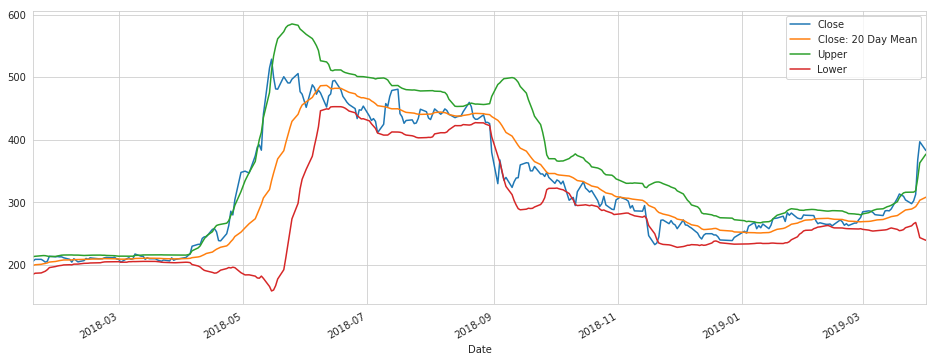

In [40]:
#close 20MA
Bit['Close: 20 Day Mean'] = Bit['Close'].rolling(20).mean()
#upper = 20MA + 2 * std(20)
Bit['Upper'] = Bit['Close: 20 Day Mean']+2*(Bit['Close'].rolling(20).std())
#lower = 20MA + 2 * std(20 )
Bit['Lower'] = Bit['Close: 20 Day Mean']-2*(Bit['Close'].rolling(20).std())
#Close
Bit[['Close','Close: 20 Day Mean','Upper','Lower']].tail(300).plot(figsize=(16,6))